In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [4]:
# Define the Hindmarsh-Rose model
def hindmarsh_rose(t, y, I, r):
    x, y1, z = y
    dxdt = y1 - x**3 + 3*x**2 - z + I
    dydt = 1 - 5*x**2 - y1
    dzdt = r * (4 * (x + 1.6) - z)
    return [dxdt, dydt, dzdt]

# Function to run simulation for specific scenario
def run_simulation(I, r):
    initial_conditions = [-1.0, 2.0, 0.5]
    t_span = (0, 1500)
    t_eval = np.arange(0, 1500, 0.005)
    solution = solve_ivp(hindmarsh_rose, t_span, initial_conditions, args=(I, r), t_eval=t_eval, method='RK45')
    return solution.t, solution.y[0]



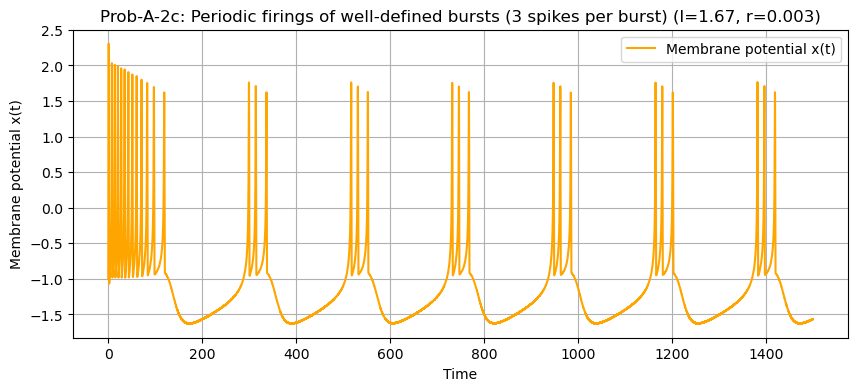

In [12]:
# Parameters for Prob-A-2c - Periodic firings of well-defined bursts (3 spikes per burst)
I_c = 1.67
r_c = 0.003
description_c = 'Periodic firings of well-defined bursts (3 spikes per burst)'

# Run the simulation for Prob-A-2c
t_c, x_t_c = run_simulation(I_c, r_c)

# Plotting the results for Prob-A-2c
plt.figure(figsize=(10, 4))
plt.plot(t_c, x_t_c, color='orange', label='Membrane potential x(t)')
plt.title(f'Prob-A-2c: {description_c} (I={I_c}, r={r_c})')
plt.xlabel('Time')
plt.ylabel('Membrane potential x(t)')
plt.grid(True)
plt.legend()
plt.savefig('Prob-A-2c.png')
plt.show()